# About Dataset

This dataset provides detailed information on 1000 cats, offering a comprehensive look at various feline characteristics. The data includes multiple attributes such as breed, age, weight, color, and gender. It has been meticulously curated to represent a wide range of cat breeds and individual differences.

- **Breed**: This column specifies the breed of each cat, including popular breeds such as Siamese, Maine Coon, Persian, Bengal, and more.
- **Age (Years)**: Indicates the age of the cats in years, providing a view of both young kittens and mature adults.
- **Weight (kg)**: Records the weight of each cat in kilograms, offering insight into the size variations across different breeds and ages.
- **Color**: Describes the coat color of the cats, which can range from solid colors like black and white to more unique patterns like calico and tabby.
- **Gender**: Denotes the gender of each cat, categorized as either Male or Fale.
Female.Fêmea.


# Imports

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Data cleaning and preparation

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CelioMaciel179/eda_cats/main/datasets/cats_dataset.csv')
df.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


## Checking duplicates

In [4]:
df.duplicated().sum()

np.int64(5)

In [5]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Breed,Age (Years),Weight (kg),Color,Gender
3,Persian,13,6,Sable,Female
29,Birman,17,7,Pointed,Female
69,Birman,17,7,Pointed,Female
178,Egyptian Mau,2,9,Gray,Male
233,Persian,13,6,Sable,Female
287,Ocicat,14,8,Cream,Male
405,Egyptian Mau,2,9,Gray,Male
436,Bengal,18,5,Brown,Female
653,Ocicat,14,8,Cream,Male
834,Bengal,18,5,Brown,Female


In [6]:
df_clean = df.drop_duplicates()
df_clean.reset_index(inplace=True, drop=True)
df_clean.tail()

,Breed,Age (Years),Weight (kg),Color,Gender
990,British Shorthair,19,5,Gray,Female
991,British Shorthair,11,2,Bicolor,Female
992,Savannah,12,5,Bicolor,Female
993,American Shorthair,8,3,Tortoiseshell,Female
994,Chartreux,11,4,Sable,Female


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        995 non-null    object
 1   Age (Years)  995 non-null    int64 
 2   Weight (kg)  995 non-null    int64 
 3   Color        995 non-null    object
 4   Gender       995 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


## Checking categorical variables

In [8]:
df_clean['Breed'].unique()

array(['Russian Blue', 'Norwegian Forest', 'Chartreux', 'Persian',
       'Ragdoll', 'Ocicat', 'Abyssinian', 'Oriental', 'Egyptian Mau',
       'American Shorthair', 'Bengal', 'Cornish Rex', 'British Shorthair',
       'Burmese', 'Singapura', 'Maine Coon', 'Turkish Angora',
       'Himalayan', 'Sphynx', 'Manx', 'Siberian', 'Birman', 'Balinese',
       'Devon Rex', 'Exotic Shorthair', 'Scottish Fold', 'Savannah',
       'Munchkin', 'Siamese', 'Tonkinese'], dtype=object)

In [9]:
df_clean['Color'].unique()

array(['Tortoiseshell', 'Brown', 'Sable', 'Tabby', 'Blue', 'Calico',
       'White', 'Black', 'Pointed', 'Red', 'Tricolor', 'Cream', 'Orange',
       'Gray', 'Bicolor'], dtype=object)

In [10]:
df_clean['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# EDA

## Statistical summary

In [11]:
df_clean.describe()

,Age (Years),Weight (kg)
count,995.000000,995.000000
mean,10.196985,5.542714
std,5.531817,2.227714
min,1.000000,2.000000
25%,5.000000,4.000000
50%,10.000000,6.000000
75%,15.000000,7.000000
max,19.000000,9.000000


In [12]:
df_clean.describe(include=['object'])

,Breed,Color,Gender
count,995,995,995
unique,30,15,2
top,Ragdoll,Tricolor,Male
freq,51,73,503


## Distribution and boxplot of numerical variables

In [13]:
def create_distribution_boxplot(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram
    sns.histplot(data=data, x=column, color='indianred', ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(data=data, y=column, color='indianred', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('')

    plt.suptitle(column, fontsize=16)
    plt.tight_layout()
    plt.show()

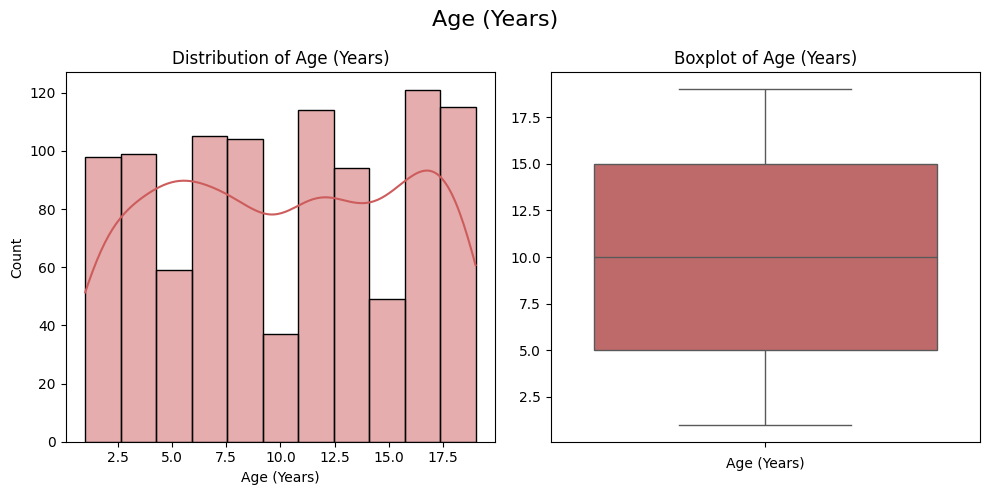

In [14]:
create_distribution_boxplot(df_clean, 'Age (Years)')

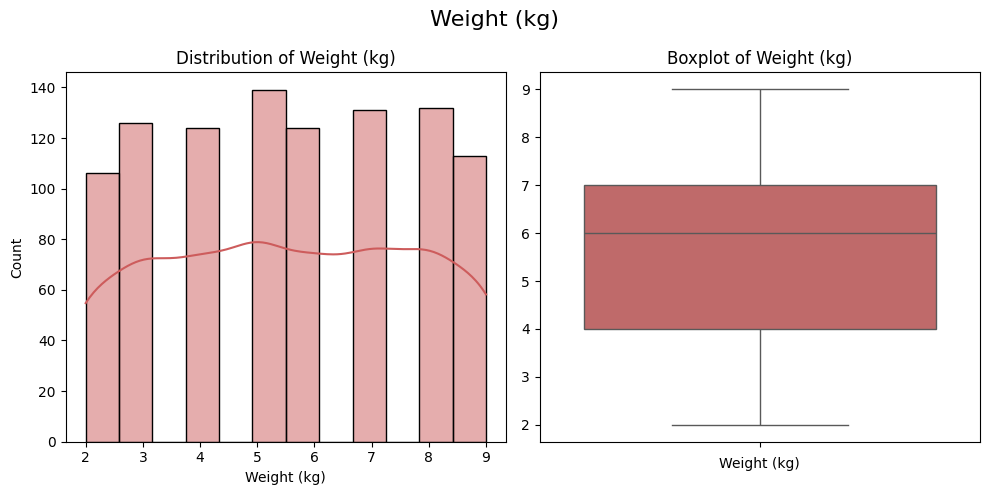

In [15]:
create_distribution_boxplot(df_clean, 'Weight (kg)')

## Correlation

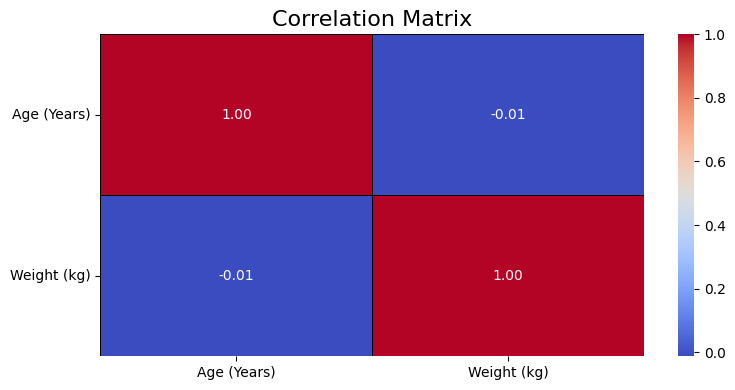

In [16]:
corr_matrix = df_clean[['Age (Years)', 'Weight (kg)']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix', fontsize=16)
plt.yticks(rotation=0)

plt.tight_layout()  
plt.show()

<Figure size 1000x800 with 0 Axes>

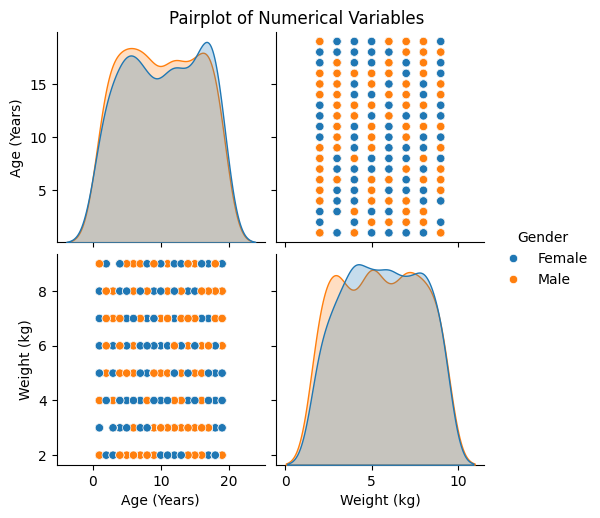

In [17]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_clean, hue='Gender')

plt.suptitle('Pairplot of Numerical Variables', y=1.02)

plt.show()

## Distribution of categorical variables

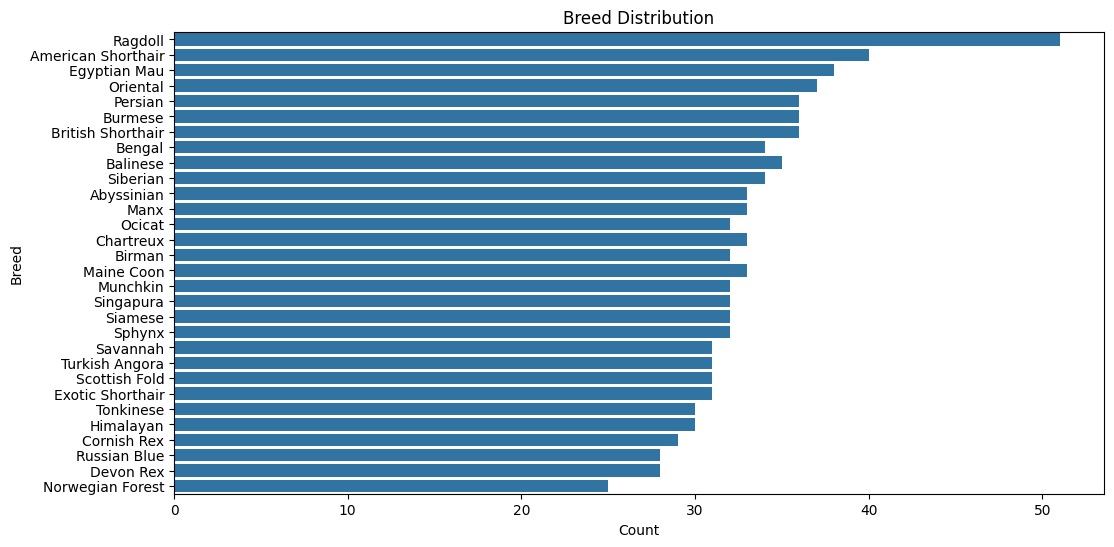

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_clean['Breed'], order=df['Breed'].value_counts().index)
plt.title('Breed Distribution')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()

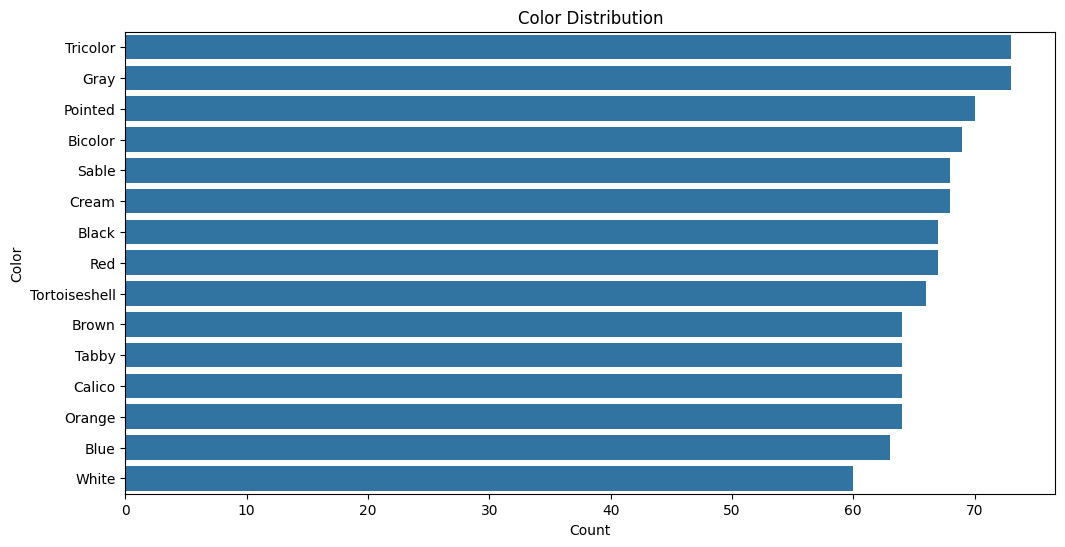

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Color'], order=df['Color'].value_counts().index)
plt.title('Color Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

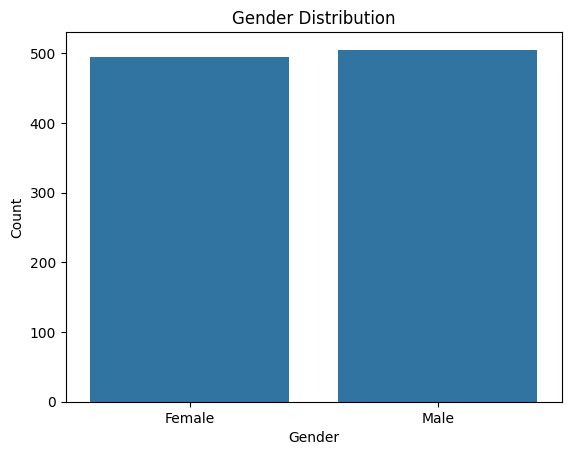

In [20]:
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Relationship between breeds and variables

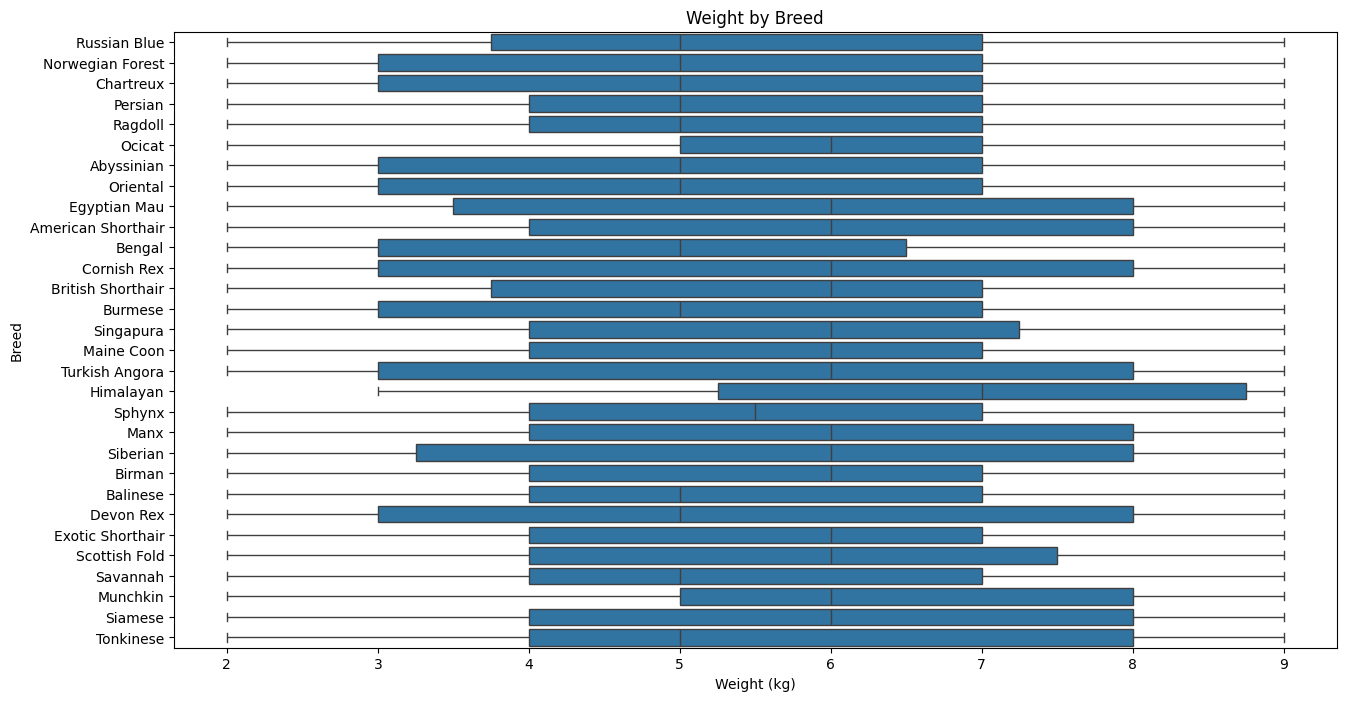

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Weight (kg)', y='Breed')
plt.title('Weight by Breed')
plt.xlabel('Weight (kg)')
plt.ylabel('Breed')
plt.show()

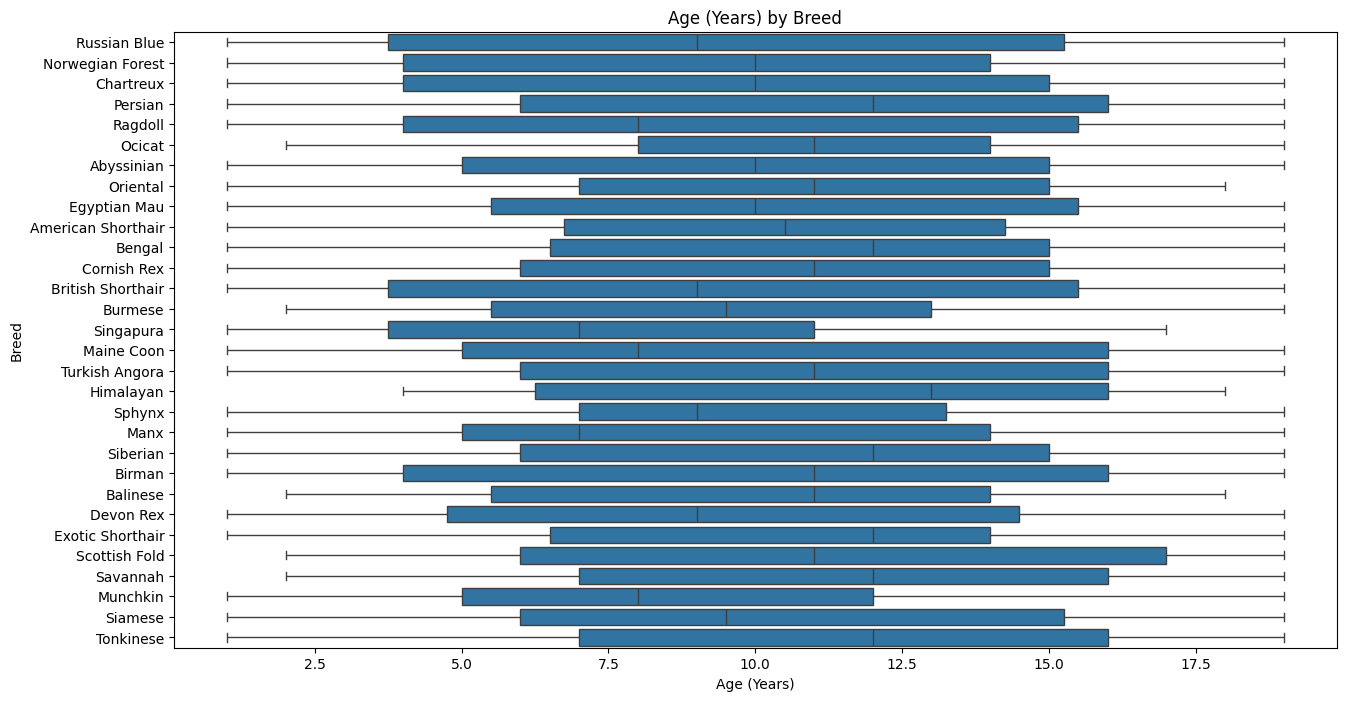

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Age (Years)', y='Breed')
plt.title('Age (Years) by Breed')
plt.xlabel('Age (Years)')
plt.ylabel('Breed')
plt.show()

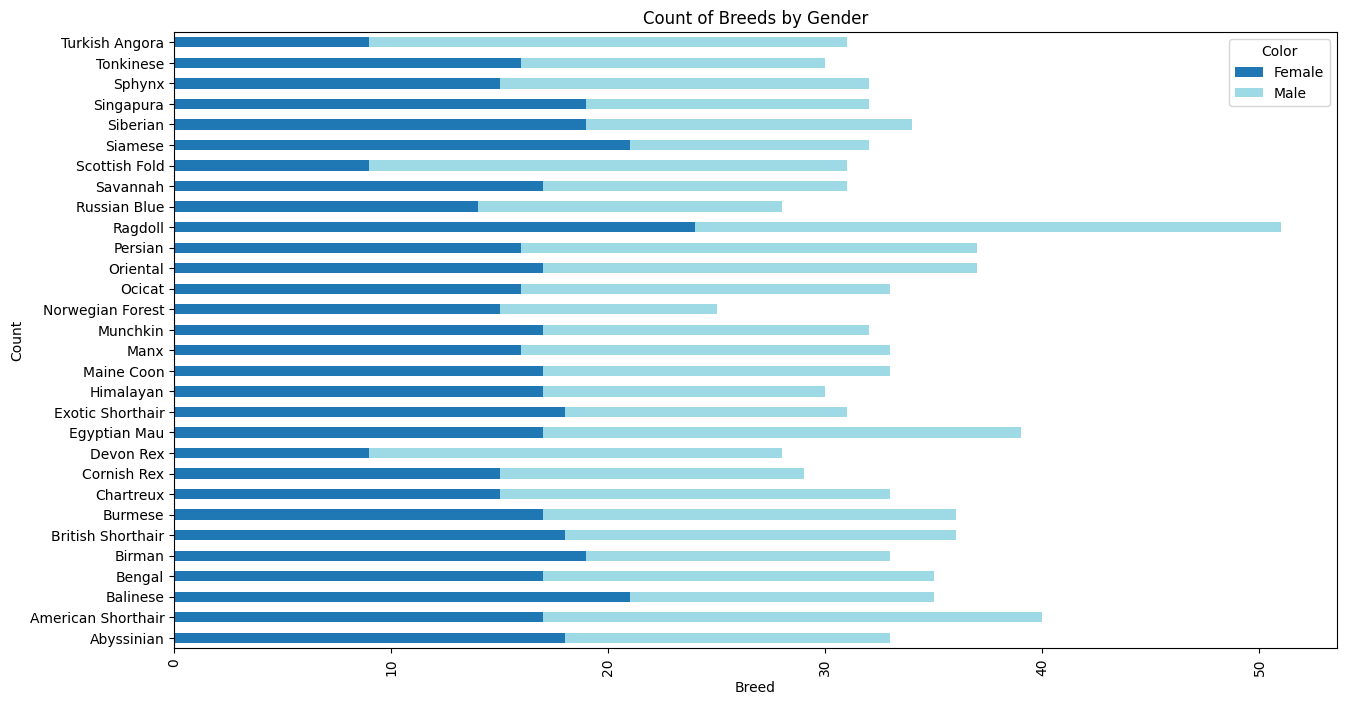

In [23]:
contingencia = pd.crosstab(df['Breed'], df['Gender'])
plt.figure(figsize=(15, 8))
contingencia.plot(kind='barh', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Count of Breeds by Gender')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Color')
plt.show()

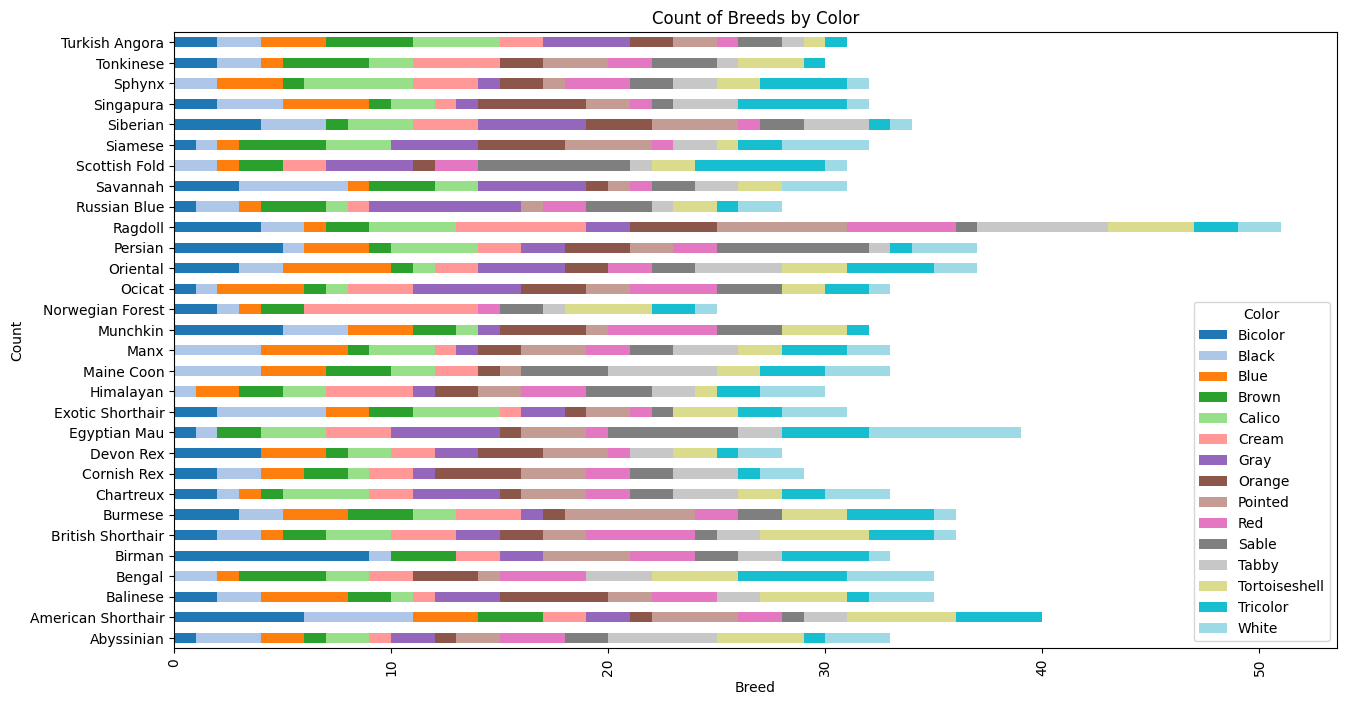

In [24]:
contingencia = pd.crosstab(df['Breed'], df['Color'])
plt.figure(figsize=(15, 8))
contingencia.plot(kind='barh', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Count of Breeds by Color')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Color')
plt.show()

## Relationship between genders and variables

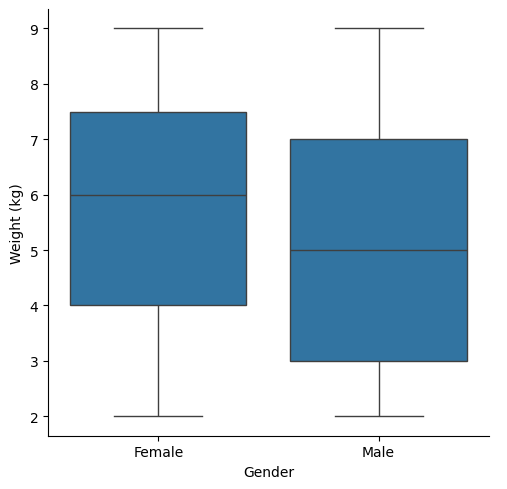

In [25]:
sns.catplot(data=df, y='Weight (kg)', x='Gender', kind='box')

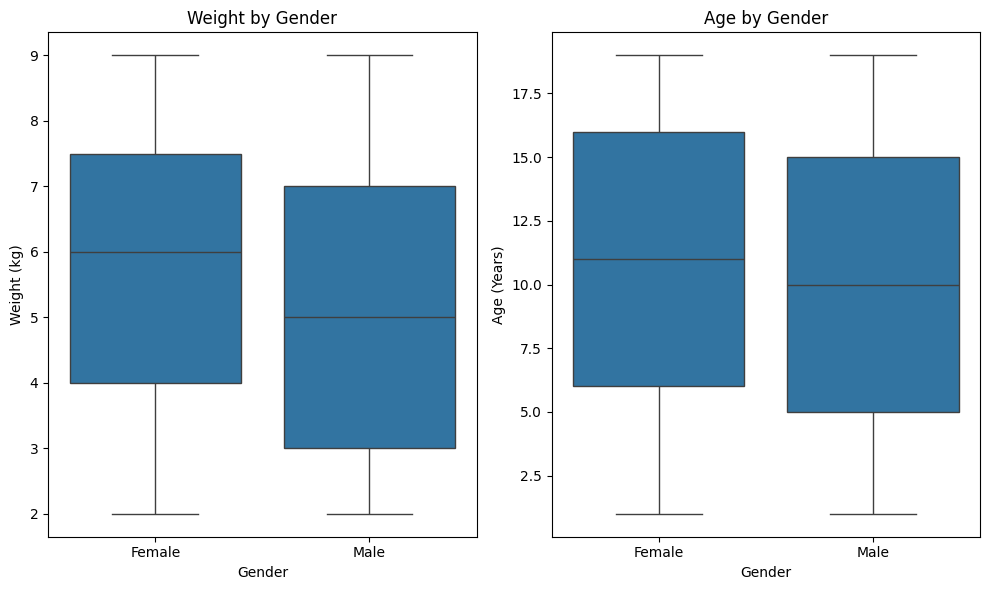

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) 
sns.boxplot(data=df, y='Weight (kg)', x='Gender')
plt.title('Weight by Gender')
plt.ylabel('Weight (kg)')
plt.xlabel('Gender')

plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y='Age (Years)', x='Gender')
plt.title('Age by Gender')
plt.ylabel('Age (Years)')
plt.xlabel('Gender')

plt.tight_layout()
plt.show()

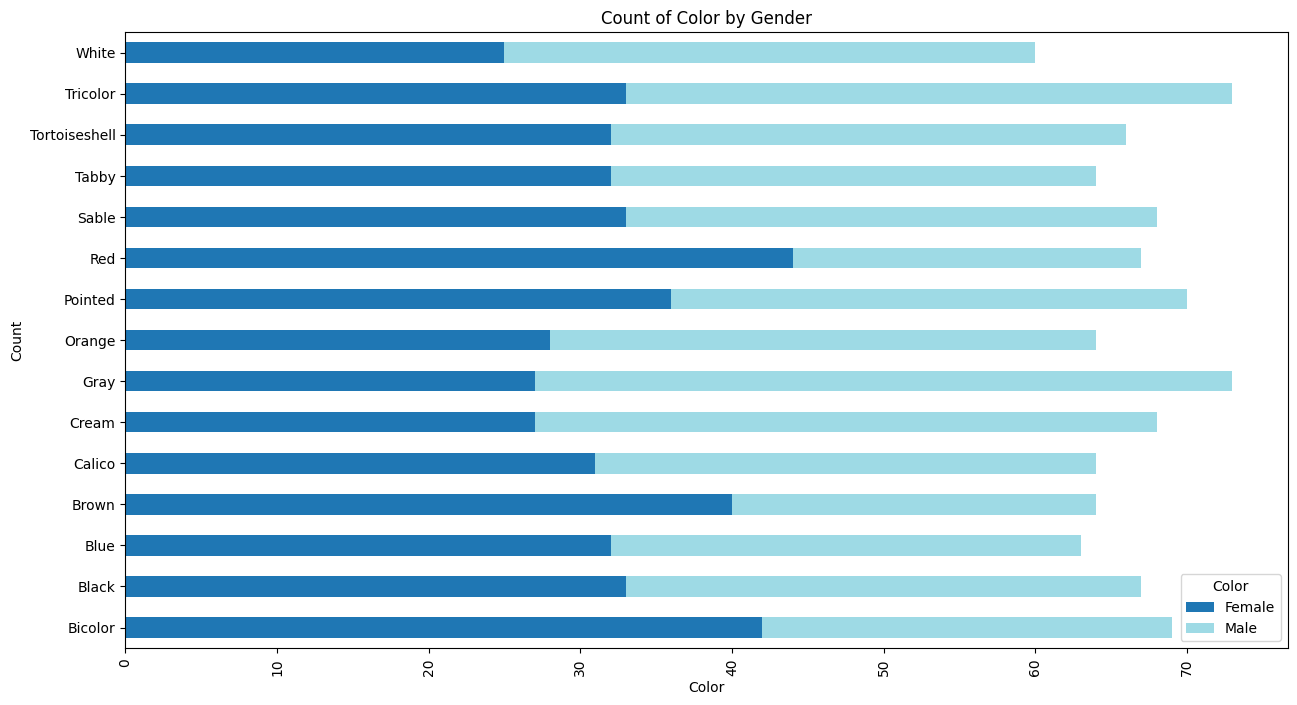

In [27]:
contingencia = pd.crosstab(df['Color'], df['Gender'])
plt.figure(figsize=(15, 8))
contingencia.plot(kind='barh', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Count of Color by Gender')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Color')
plt.show()

## Relationship between colors and variables

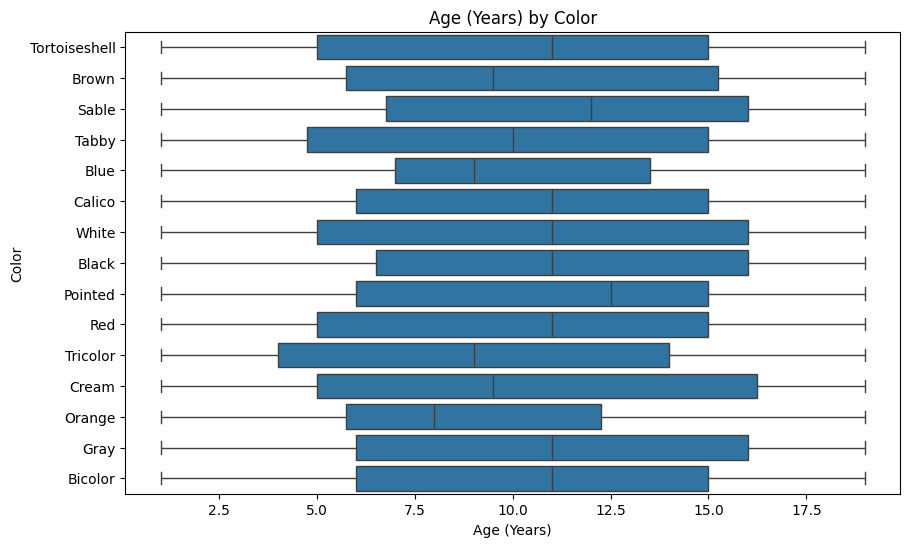

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age (Years)', y='Color')
plt.title('Age (Years) by Color')
plt.xlabel('Age (Years)')
plt.ylabel('Color')
plt.show()

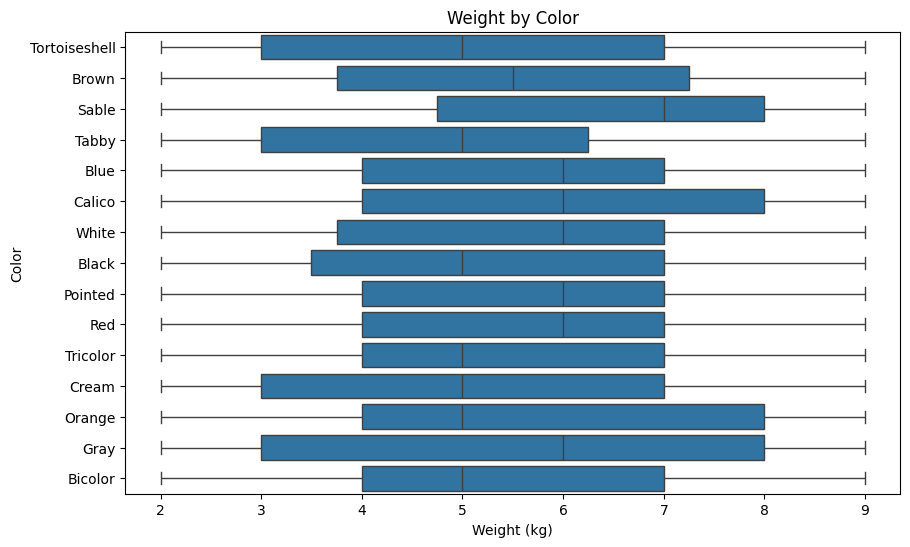

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Weight (kg)', y='Color')
plt.title('Weight by Color')
plt.xlabel('Weight (kg)')
plt.ylabel('Color')
plt.show()

# Modeling

## Pre-processing

In [30]:
col_cat = ['Breed', 'Color']

df_cat = df_clean[col_cat]
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df_cat).toarray(),
                          columns=encoder.get_feature_names_out(col_cat))

df_final = pd.concat([df.drop(col_cat, axis=1), df_encoded], axis=1)

In [31]:
df_cat.isnull().sum()

Breed    0
Color    0
dtype: int64

In [32]:
df_final.dropna(inplace=True)

In [33]:
X = df_final.drop('Gender', axis=1)
y = df_final['Gender']

In [34]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Baseline

In [35]:
dummy = DummyClassifier()
dummy.fit(X, y)

print(f"{round(dummy.score(X_test, y_test),1) * 100}%")

50.0%


## Models

In [40]:
pipelines = [
    ('Logistic Regression', Pipeline([
        ('preprocessing', StandardScaler()),  
        ('model', LogisticRegression(max_iter=200, random_state=55))
    ])),
    ('KNN', Pipeline([
        ('preprocessing', MinMaxScaler()),  
        ('model', KNeighborsClassifier())
    ])),
    ('Decision Tree', Pipeline([
        ('model', DecisionTreeClassifier(max_depth=10, random_state=55))  
    ])),
    ('Support Vector Machine', Pipeline([
        ('preprocessing', StandardScaler()),  
        ('model', SVC(random_state=55))
    ])),
    ('Random Forest', Pipeline([
        ('model', RandomForestClassifier(max_depth=10, random_state=55))  
    ]))
]

results = []


for name, pipeline in pipelines:

    kf = KFold(n_splits = 5, shuffle = True, random_state = 55)
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    
    
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'CrossValidation_Accuracy_Mean': scores.mean(),
        'CrossValidation_Accuracy_Std': scores.std(),
        'Test_Accuracy': test_accuracy
    })

results_df = pd.DataFrame(results)
results_df

,Model,CrossValidation_Accuracy_Mean,CrossValidation_Accuracy_Std,Test_Accuracy
0,Logistic Regression,0.491156,0.026949,0.512563
1,KNN,0.488726,0.015530,0.522613
2,Decision Tree,0.473624,0.029998,0.492462
3,Support Vector Machine,0.473593,0.026660,0.547739
4,Random Forest,0.454788,0.026772,0.512563


## Avaliation

SVM
              precision    recall  f1-score   support

      Female       0.54      0.59      0.56        98
        Male       0.56      0.50      0.53       101

    accuracy                           0.55       199
   macro avg       0.55      0.55      0.55       199
weighted avg       0.55      0.55      0.55       199



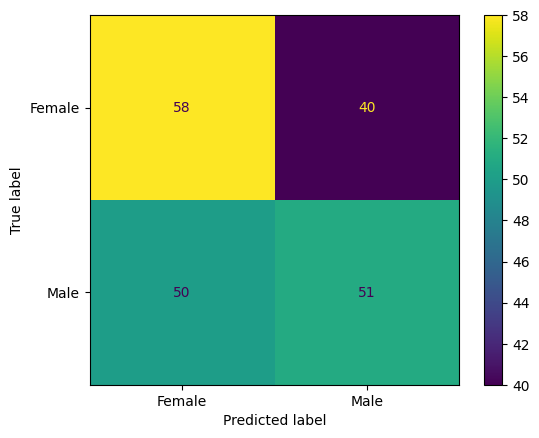

In [45]:
pipelines[3][1].fit(X, y)
y_pred = pipelines[3][1].predict(X_test)

print("SVM")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)